<a href="https://colab.research.google.com/github/Abinvarghese07/Abinvarghese07/blob/main/CNN_Project_TCS%20iON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#!pip install tensorflow==1.14.0

In [ ]:
#!pip install q keras==2.3.1

In [ ]:
#import tensorflow

In [ ]:
tensorflow.__version__
#tensorflow version == 1.14.0.

'1.14.0'

In [ ]:
#import keras

In [ ]:
keras.__version__
#keras version == 2.3.1

'2.3.1'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/INTERNSHIP/DATA"]).decode("utf8"))
forms=pd.read_csv('/content/drive/MyDrive/INTERNSHIP/DATA/sentences.txt', header=None, error_bad_lines=False )
print(forms.head)

data_subset
forms_for_parsing.txt
forms.txt
sample_data
sentences.txt
words.tgz
words.txt

<bound method NDFrame.head of                                                        0
0      #--- sentences.txt ---------------------------...
1                                                      #
2                    # iam database sentence information
3                                                      #
4      # format: a01-000u-s0-00 0 ok 154 19 408 746 1...
...                                                  ...
12260  r06-143-s01-00 1 ok 185 9 1104 900 936 114 She...
12261  r06-143-s02-00 2 ok 186 16 1567 1083 670 107 '...
12262  r06-143-s03-00 3 ok 184 13 344 1250 1032 86 I|...
12263  r06-143-s04-00 4 ok 184 4 1427 1262 494 92 Did...
12264  r06-143-s04-01 4 ok 186 21 347 1428 1581 130 t...

[12265 rows x 1 columns]>


b'Skipping line 14: expected 1 fields, saw 2\nSkipping line 20: expected 1 fields, saw 4\nSkipping line 33: expected 1 fields, saw 2\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 41: expected 1 fields, saw 2\nSkipping line 47: expected 1 fields, saw 2\nSkipping line 55: expected 1 fields, saw 2\nSkipping line 61: expected 1 fields, saw 2\nSkipping line 67: expected 1 fields, saw 2\nSkipping line 72: expected 1 fields, saw 2\nSkipping line 78: expected 1 fields, saw 2\nSkipping line 82: expected 1 fields, saw 2\nSkipping line 88: expected 1 fields, saw 2\nSkipping line 89: expected 1 fields, saw 2\nSkipping line 93: expected 1 fields, saw 2\nSkipping line 99: expected 1 fields, saw 2\nSkipping line 101: expected 1 fields, saw 2\nSkipping line 105: expected 1 fields, saw 2\nSkipping line 110: expected 1 fields, saw 2\nSkipping line 112: expected 1 fields, saw 2\nSkipping line 113: expected 1 fields, saw 2\nSkipping line 117: expected 1 fields, saw 3\nSkipping line 118: expec

In [ ]:
#Let's create a dictionary with image and sentence mapping.

d = {}
with open('/content/drive/MyDrive/INTERNSHIP/DATA/sentences.txt') as f:
    for line in f:
      line=line.strip()
      print(line)

Streaming output truncated to the last 5000 lines.
k03-144-s06-02 6 ok 191 13 380 1964 870 88 New|Africa|lot|-|'
k03-144-s07-00 7 ok 191 11 1331 1964 837 119 '|Do|they|confide
k03-144-s07-01 7 err 189 9 373 2138 528 136 in|you|?
k03-144-s08-00 8 err 189 16 882 2132 1523 120 Have|you|spoken|to|them|?|'
k03-152-s00-00 0 ok 160 34 347 743 1791 91 '|Only|at|yesterday's|meeting|-|they|'re|very|restless|,|Prime
k03-152-s00-01 0 err 160 9 352 922 205 55 Minister|.
k03-152-s01-00 1 err 160 31 614 924 1427 87 They|feel|that|it|'s|very|old-fashioned|-|shooting
k03-152-s01-01 1 ok 162 16 342 1098 745 75 down|mobs|of|natives|.
k03-152-s02-00 2 ok 162 16 1137 1101 963 91 They|'re|very|much|afraid|that
k03-152-s02-01 2 ok 167 39 347 1273 1762 104 if|the|Opposition|get|a|Commission|of|Enquiry|some
k03-152-s02-02 2 ok 170 24 332 1452 1534 85 rather|dismal|stuff|is|going|to|come|out|.|'
k03-152-s03-00 3 ok 176 29 345 1636 1695 95 '|Young|back-benchers|are|always|restive|when|they|'re
k03-152-s03-01 3 e

In [ ]:
import os
import glob
# All image file path list and image file name list are created.
tmp_filepath=[]
tmp_imgname=[]
path_to_files = os.path.join('/content/drive/MyDrive/INTERNSHIP/DATA/sample_data', '*')
for filename in sorted(glob.glob(path_to_files)):
    tmp_filepath.append(filename)
    image_name = filename.split('/')[-1]
    file, ext = os.path.splitext(image_name)
    tmp_imgname.append(file)
    #print(file)
print(len(tmp_filepath))
print(len(tmp_imgname))

2339
2339


In [ ]:
#Let's create a dictionary with images in the sample data image and sentence mapping.

d = {}
with open('/content/drive/MyDrive/INTERNSHIP/DATA/sentences.txt') as f:
    for line in f:
      line=line.strip()
      imgname = line.split(' ')[0]
      if imgname in tmp_imgname:
        key=imgname
        sentences=line.split(' ')[-1]
        d[key] = sentences
print(len(d.keys()))

2339


In [ ]:
d.keys()

dict_keys(['a01-000u-s00-00', 'a01-000u-s00-01', 'a01-000u-s00-02', 'a01-000u-s01-01', 'a01-000u-s01-03', 'a01-003u-s00-00', 'a01-003u-s00-01', 'a01-003u-s00-02', 'a01-003u-s01-01', 'a01-003u-s01-02', 'a01-003u-s01-03', 'a01-003u-s01-04', 'a01-003u-s02-00', 'a01-003u-s02-01', 'a01-003u-s02-02', 'a01-003u-s02-03', 'a01-007u-s00-00', 'a01-007u-s00-01', 'a01-007u-s01-00', 'a01-007u-s01-01', 'a01-007u-s01-02', 'a01-007u-s01-03', 'a01-007u-s01-04', 'a01-007u-s02-00', 'a01-007u-s02-01', 'a01-007u-s02-02', 'a01-007u-s02-03', 'a01-007u-s02-04', 'a01-011u-s00-00', 'a01-011u-s00-01', 'a01-011u-s00-02', 'a01-011u-s00-03', 'a01-011u-s00-04', 'a01-011u-s00-05', 'a01-011u-s01-00', 'a01-011u-s01-01', 'a01-011u-s01-02', 'a01-011u-s01-03', 'a01-011u-s01-04', 'a01-014u-s00-00', 'a01-014u-s00-01', 'a01-014u-s01-01', 'a01-014u-s02-00', 'a01-014u-s02-01', 'a01-014u-s03-00', 'a01-014u-s04-00', 'a01-014u-s04-01', 'a01-014u-s04-02', 'a01-014u-s04-03', 'a01-020u-s00-00', 'a01-020u-s00-01', 'a01-020u-s00-02', '

In [ ]:
# All image file-names list and target-sentences list are created.
tmp = []
target_list = []

path_to_files = os.path.join('/content/drive/MyDrive/INTERNSHIP/DATA/sample_data', '*')
for filename in sorted(glob.glob(path_to_files)):
    #print(filename)
    tmp.append(filename)
    image_name = filename.split('/')[-1]
    #print(image_name)
    file, ext = os.path.splitext(image_name)
    #print(file,"===", ext)
    parts = file.split('-')
    #print(parts)
    form = file
    #print(form)
    for key in d:
        if key == form:
            target_list.append(str(d[form]))

img_files = np.asarray(tmp)
print(img_files.shape)
img_targets = np.asarray(target_list)
print(img_targets.shape)

(2339,)
(2339,)


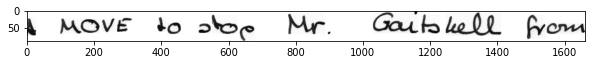

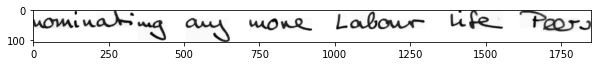

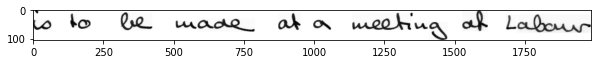

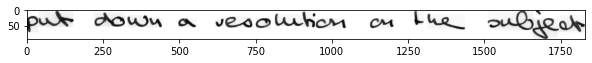

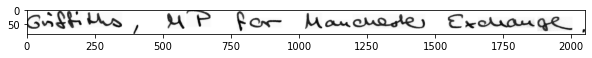

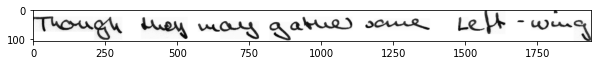

In [ ]:
import matplotlib.image as mpimg
# visualize the image data
for filename in img_files[:6]:
    img=mpimg.imread(filename)
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap ='gray')

In [ ]:
from sklearn.preprocessing import LabelEncoder
# normalisation is done using label encoder. No, categorical data.
encoder = LabelEncoder()
encoder.fit(img_targets)
encoded_Y = encoder.transform(img_targets)

print(img_files[:10], img_targets[:10], encoded_Y[:10])

['/content/drive/MyDrive/INTERNSHIP/DATA/sample_data/a01-000u-s00-00.png'
 '/content/drive/MyDrive/INTERNSHIP/DATA/sample_data/a01-000u-s00-01.png'
 '/content/drive/MyDrive/INTERNSHIP/DATA/sample_data/a01-000u-s00-02.png'
 '/content/drive/MyDrive/INTERNSHIP/DATA/sample_data/a01-000u-s01-01.png'
 '/content/drive/MyDrive/INTERNSHIP/DATA/sample_data/a01-000u-s01-03.png'
 '/content/drive/MyDrive/INTERNSHIP/DATA/sample_data/a01-003u-s00-00.png'
 '/content/drive/MyDrive/INTERNSHIP/DATA/sample_data/a01-003u-s00-01.png'
 '/content/drive/MyDrive/INTERNSHIP/DATA/sample_data/a01-003u-s00-02.png'
 '/content/drive/MyDrive/INTERNSHIP/DATA/sample_data/a01-003u-s01-01.png'
 '/content/drive/MyDrive/INTERNSHIP/DATA/sample_data/a01-003u-s01-02.png'] ['A|MOVE|to|stop|Mr.|Gaitskell|from'
 'nominating|any|more|Labour|life|Peers'
 'is|to|be|made|at|a|meeting|of|Labour'
 'put|down|a|resolution|on|the|subject' 'P|for|Manchester|Exchange|.'
 'Though|they|may|gather|some|Left-wing'
 'support|,|a|large|majority|o

In [ ]:
max(encoded_Y)

2132

In [ ]:

from sklearn.model_selection import train_test_split
# Splitting of data into training and validation sets for cross validation with 4:1:1 ratio.
train_files, rem_files, train_targets, rem_targets = train_test_split(
        img_files, encoded_Y, train_size=0.66, random_state=52, shuffle= True)

validation_files, test_files, validation_targets, test_targets = train_test_split(
        rem_files, rem_targets, train_size=0.5, random_state=22, shuffle=True)

print(train_files.shape, validation_files.shape, test_files.shape)
print(train_targets.shape, validation_targets.shape, test_targets.shape)


(1543,) (398,) (398,)
(1543,) (398,) (398,)


In [ ]:
113*113/16

798.0625

In [ ]:
# Generator function for generating random crops from each sentence randomly cropping 113*113 patches from images
from PIL import Image
from random import *
from __future__ import division

batch_size = 4
num_classes = 2391

def generate_data(samples, target_files,  batch_size=batch_size, factor = 0.1 ):
    num_samples = len(samples)
    from sklearn.utils import shuffle
    while 1: # Loop forever so the generator never terminates
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            #print(batch_samples)
            #print(len(batch_samples))
            batch_targets = target_files[offset:offset+batch_size]
            #print(batch_targets)

            images = []
            targets = []
            for i in range(len(batch_samples)):
                batch_sample = batch_samples[i]
                batch_target = batch_targets[i]
                im = Image.open(batch_sample).convert('L') #converting to monochrome images
                #plt.figure(figsize=(10,10))
                #plt.imshow(im, cmap ='gray')
                #print(np.asarray(im).shape)
                cur_width = im.size[0]
                #print(cur_width)
                cur_height = im.size[1]
                #print(cur_height)

                # print(cur_width, cur_height)
                height_fac = 113 / cur_height
                #print(height_fac)

                new_width = int(cur_width * height_fac)
                size = new_width, 113

                imresize = im.resize((size), Image.ANTIALIAS)  # Resize so height = 113 while keeping aspect ratio
                #plt.figure(figsize=(10,10))
                #plt.imshow(imresize, cmap ='gray')
                now_width = imresize.size[0]
                now_height = imresize.size[1]
                #print(now_width, now_height)
                # Generate crops of size 113x113 from this resized image and keep random 10% of crops

                avail_x_points = list(range(0, now_width - 113 ))# total x start points are from 0 to width -113
                #print(avail_x_points)

                # Pick random x%
                pick_num = int(len(avail_x_points)*factor)
                #print(pick_num)

                # Now pick
                random_startx = sample(avail_x_points,  pick_num)
                #print(len(random_startx))

                for start in random_startx:
                    imcrop = imresize.crop((start, 0, start+113, 113))
                    #plt.figure(figsize=(10,10))
                    #plt.imshow(imcrop, cmap ='gray')
                    #print(len(np.asarray(imcrop)))
                    images.append(np.asarray(imcrop))
                    targets.append(batch_target)
            
            #print(images[:1])
            # trim image to only see section with road
            X_train = np.array(images)
            #X_train=X_train.flatten()
            #print(X_train.shape)
            y_train = np.array(targets)
            #print(y_train.shape)

            #reshape X_train for feeding in later
            X_train = X_train.reshape(X_train.shape[0], 113, 113,1)
            #print(X_train.shape)
            #convert to float and normalize
            X_train = X_train.astype('float32')
            X_train /= 255

            #One hot encode y
            
            #label_binarizer = LabelBinarizer()
            
            #label_binarizer.fit(range(10))
            #y_train = label_binarizer.transform(y_train)
            
            y_train = to_categorical(y_train, num_classes)
            #X_train=X_train.flatten()
            #y_train=y_train.flatten()
            print(X_train.shape)
            print(y_train.shape)
            yield shuffle(X_train, y_train)


In [ ]:
# For training and testing, generator function is called with the intent of making train and test generator data.
train_generator = generate_data(train_files, train_targets, batch_size=batch_size, factor = 0.3)
validation_generator = generate_data(validation_files, validation_targets, batch_size=batch_size, factor = 0.3)
test_generator = generate_data(test_files, test_targets, batch_size=batch_size, factor = 0.1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Activation, BatchNormalization
from keras.layers.convolutional import Convolution2D, Cropping2D, ZeroPadding2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical

In [ ]:
# A Keras Model is built. Summary of the model is printed below.
def resize_image(image):
    import tensorflow as tf
    return tf.image.resize(image,[56,56])
# Function to resize image to 64x64
row, col, ch = 113, 113, 1

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(row, col, ch)))

# Resise data within the neural network
model.add(Lambda(resize_image))  #resize images to allow for easy computation
#model.add(Lambda(lambda x: resize_image))
# CNN model - Building the model suggested in paper
model.add(Convolution2D(filters= 32, kernel_size =(5,5), strides= (2,2), padding='same', name='conv1')) #96
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool1'))

model.add(Convolution2D(filters= 64, kernel_size =(3,3), strides= (1,1), padding='same', name='conv2'))  #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool2'))

model.add(Convolution2D(filters=128, kernel_size =(3,3), strides= (1,1), padding='same', name='conv3'))  #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool3'))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128, name='dense1'))  #1024
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64, name='dense2'))  #1024
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))  #softmax since output is within 50 classes
print("Worked till here")

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

print(model.summary())

Worked till here
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 115, 115, 1)       0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 56, 56, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 32)        832       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 1

In [ ]:
# Training the Model
nb_epoch = 10

samples_per_epoch = 2391
nb_val_samples = 398


# #save every model using Keras checkpoint
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/MyDrive/INTERNSHIP/Model1/check-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath= filepath, verbose=1, save_best_only=False)
callbacks_list = [checkpoint]

# #Model fit generator
history_object = model.fit(train_generator, steps_per_epoch= samples_per_epoch,
                                      validation_data=validation_generator,
                                      validation_steps=nb_val_samples, epochs=nb_epoch, verbose=1, callbacks=callbacks_list)

Streaming output truncated to the last 5000 lines.
 982/2391 [===========>..................] - ETA: 1:09:20 - loss: 7.3439 - accuracy: 0.0024(1728, 113, 113, 1)
(1728, 2391)
 983/2391 [===========>..................] - ETA: 1:09:19 - loss: 7.3440 - accuracy: 0.0024(1755, 113, 113, 1)
(1755, 2391)
 984/2391 [===========>..................] - ETA: 1:09:17 - loss: 7.3440 - accuracy: 0.0024(1369, 113, 113, 1)
(1369, 2391)
 985/2391 [===========>..................] - ETA: 1:09:13 - loss: 7.3440 - accuracy: 0.0024(2289, 113, 113, 1)
(2289, 2391)
 986/2391 [===========>..................] - ETA: 1:09:09 - loss: 7.3441 - accuracy: 0.0024(1787, 113, 113, 1)
(1787, 2391)
 987/2391 [===========>..................] - ETA: 1:09:07 - loss: 7.3442 - accuracy: 0.0024(1825, 113, 113, 1)
(1825, 2391)
 988/2391 [===========>..................] - ETA: 1:09:04 - loss: 7.3442 - accuracy: 0.0024(1146, 113, 113, 1)
(1146, 2391)
 989/2391 [===========>..................] - ETA: 1:09:02 - loss: 7.3443 - accura

In [ ]:
### Performance Metrics

#Let us now test our model for calculating accuracy

model.load_weights('"/content/drive/MyDrive/INTERNSHIP/Model1/check-01-0.0000.hdf5')
model.load_weights('"/content/drive/MyDrive/INTERNSHIP/Model1/check-02-0.0000.hdf5')
scores = model.evaluate_generator(test_generator,398) # 398 is the number of test images.
print("Accuracy = ", scores[1] , " ::" , len(scores))


In [ ]:
"""Load in test data."""
from PIL import Image
images = []
for filename in test_files[:50]:
     im = Image.open(filename).convert('L') # converting to monochrome images

     cur_width = im.size[0]
     cur_height = im.size[1]

     print("Before Crop:", cur_width, cur_height)
     height_fac = 113 / cur_height

     new_width = int(cur_width * height_fac)
     size = new_width, 113

     imresize = im.resize((size), Image.ANTIALIAS)  # Resize so height = 113 while keeping aspect ratio
     now_width = imresize.size[0]
     now_height = imresize.size[1]
     print("After Crop:", now_width, now_height)
#     # Generate crops of size 113x113 from this resized image and keep random 10% of crops

     avail_x_points = list(range(0, now_width - 113 ))# total x start points are from 0 to width -113

#     # Pick random x%
     factor = 0.1
     pick_num = int(len(avail_x_points)*factor)
     print("Pick Number is ::", pick_num)
    
     random_startx = sample(avail_x_points,  pick_num)

     for start in random_startx:
         imcrop = imresize.crop((start, 0, start+113, 113))
         images.append(np.asarray(imcrop))
         
     X_test = np.array(images)
    
     X_test = X_test.reshape(X_test.shape[0], 113, 113, 1)
#     #convert to float and normalize
     X_test = X_test.astype('float32')
     X_test /= 255
     shuffle(X_test)

print(X_test.shape)

Before Crop: 1786 110
After Crop: 1834 113
Pick Number is :: 172
Before Crop: 1958 70
After Crop: 3160 113
Pick Number is :: 304
Before Crop: 1621 88
After Crop: 2081 113
Pick Number is :: 196
Before Crop: 479 131
After Crop: 413 113
Pick Number is :: 30
Before Crop: 1697 144
After Crop: 1331 113
Pick Number is :: 121
Before Crop: 301 127
After Crop: 267 113
Pick Number is :: 15
Before Crop: 1679 112
After Crop: 1693 113
Pick Number is :: 158
Before Crop: 1986 141
After Crop: 1591 113
Pick Number is :: 147
Before Crop: 1844 165
After Crop: 1262 113
Pick Number is :: 114
Before Crop: 1969 149
After Crop: 1493 113
Pick Number is :: 138
Before Crop: 1778 171
After Crop: 1174 113
Pick Number is :: 106
Before Crop: 1775 118
After Crop: 1699 113
Pick Number is :: 158
Before Crop: 1642 138
After Crop: 1344 113
Pick Number is :: 123
Before Crop: 709 119
After Crop: 673 113
Pick Number is :: 56
Before Crop: 465 51
After Crop: 1030 113
Pick Number is :: 91
Before Crop: 1852 115
After Crop: 1819 

In [ ]:
# Creating the predictive model

predictions = model.predict(X_test, verbose =1)

print(predictions.shape)
predicted_writer = []
for pred in predictions:
     predicted_writer.append(np.argmax(pred))
print(len(predicted_writer))


7090/7090 [==============================] - 6s 888us/step
(7090, 800)
7090
